In [1]:
from fastai.tabular import *
from fastai import *

In [2]:
! ls

predict-ratings-collborative-filtering.ipynb
Predict-ratings-fastai-tabular.ipynb


In [385]:
pd

<module 'pandas' from '/home/sidravic/Dropbox/code/workspace/rails_apps/idylmynds/data_preprocessing/venv/lib/python3.6/site-packages/pandas/__init__.py'>

In [8]:
path = Path('.')
ROOT_PATH = Path(path/'../')
DATA_PATH = ROOT_PATH/'data'
SAVED_MODELS = ROOT_PATH/'saved_models'

reviews_file_path = DATA_PATH/'reviews_with_category.csv'

In [9]:
df = pd.read_csv(reviews_file_path)

In [10]:
df

,Unnamed: 0,product_id,product,brand,id,cosmetics_review_id,user_nickname,rating,review_text,review_title,...,IncentivizedReview,hairCondition,hairColor,beautyInsider,skinTone,age,eyeColor,hairConcerns,product_category_primary,product_category_secondary
0,0,f309a5aa-c47a-4c3c-9e7b-ff6cf2f71e7a,Balenciaga Paris,BALENCIAGA,0ba8b592-4a23-497e-a552-7a00d2aab624,09e96669-6277-48b1-9e81-a41adec3bea1,NaN,5,"Until now, this was only available at very hig...",My Favorite Perfume!,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fragrance,NaN
1,1,94d1384c-1b58-402f-96a8-30d82fb1a106,Pre-Shave Oil - Unscented,The Art of Shaving,9e4619a8-e16d-4a7e-8147-24648db5b06e,8d998af2-04ad-4ac9-8304-c29b798f6e80,charlie201,5,This is another excellent product that complim...,NaN,...,NaN,NaN,NaN,yes,NaN,35to44,NaN,NaN,Men,Shaving
2,2,3858badd-8a32-4775-996b-8f08197dffaf,Orange Sanguine Cologne Absolue Pure Perfume,Atelier Cologne,c839ee43-074b-48e6-98a9-1d2350192ec9,9332d1b1-abc0-43ee-b8f7-0aaf4fabf1df,sz123,1,This starts out smelling like a delieghtfully ...,I'll pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fragrance,NaN
3,3,f309a5aa-c47a-4c3c-9e7b-ff6cf2f71e7a,Balenciaga Paris,BALENCIAGA,fcd90538-4465-4ca3-8c27-734b4d81c6c8,09e96669-6277-48b1-9e81-a41adec3bea1,dolceragazza,5,I have received lots of compliments when I wea...,love it!!!!,...,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,Fragrance,NaN
4,4,1a21cbc0-44c8-4581-bc3f-0f8b32292864,Glycolic Facial Cleanser,Anthony,4478b6f8-27a4-4585-a829-e7e3bb226f50,1bcabd81-b7ce-453c-bd39-5267272fc3ee,MouseRat,5,I grabbed this deluxe sample for my boyfriend ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Men,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376478,376478,ecd25af0-2a66-4828-89b2-6976e45ff1a6,"BIRTHDAY GIFT KVD BEAUTY TATTOO LINER, SETTING...",Kat Von D,c926becf-0ac6-4f8f-9af0-ec726edab196,19fb07ef-0cd9-46c9-a6b3-8f1d2bb00c51,bellacea,5,nice product exellent colors,NaN,...,NaN,NaN,black,NaN,olive,over54,brown,Frizz,NaN,NaN
376479,376479,ecd25af0-2a66-4828-89b2-6976e45ff1a6,"BIRTHDAY GIFT KVD BEAUTY TATTOO LINER, SETTING...",Kat Von D,754d3b31-a788-4dab-b9d4-9a36055f3fa7,19fb07ef-0cd9-46c9-a6b3-8f1d2bb00c51,magereyes,5,I like water proof eye liner and the reasonabl...,NaN,...,NaN,NaN,brunette,NaN,tan,over54,brown,StraighteningSmoothing,NaN,NaN
376480,376480,ecd25af0-2a66-4828-89b2-6976e45ff1a6,"BIRTHDAY GIFT KVD BEAUTY TATTOO LINER, SETTING...",Kat Von D,334bc321-7da7-4a30-a58d-32295dbd90ec,19fb07ef-0cd9-46c9-a6b3-8f1d2bb00c51,DianeA23,5,I love this product! It is high quality & easy...,NaN,...,True,chemicallyTreated,blonde,NaN,medium,NaN,blue,AntiAging,NaN,NaN
376481,376481,ecd25af0-2a66-4828-89b2-6976e45ff1a6,"BIRTHDAY GIFT KVD BEAUTY TATTOO LINER, SETTING...",Kat Von D,01d3f8db-7cff-4c86-9ad0-82eaaa3e2854,19fb07ef-0cd9-46c9-a6b3-8f1d2bb00c51,thelovelyrach,2,Lipstick set way too small. Don’t think the ta...,NaN,...,True,dry,brunette,NaN,porcelain,NaN,hazel,AntiAging,NaN,NaN


### Remove unwanted columns and keep review text and id for deduplication

In [11]:
df.columns

Index(['Unnamed: 0', 'product_id', 'product', 'brand', 'id',
       'cosmetics_review_id', 'user_nickname', 'rating', 'review_text',
       'review_title', 'avataar_url', 'submitted_date', 'modified_date',
       'createdAt', 'updatedAt', 'StaffContext', 'VerifiedPurchaser',
       'skinConcerns', 'skinType', 'IncentivizedReview', 'hairCondition',
       'hairColor', 'beautyInsider', 'skinTone', 'age', 'eyeColor',
       'hairConcerns', 'product_category_primary',
       'product_category_secondary'],
      dtype='object')

In [12]:
relevant_df = df[['product_id', 
    'product', 
    'brand', 
    'user_nickname', 
    'rating', 
    'id',     
    'review_text',      
    'StaffContext', 
    'VerifiedPurchaser', 
    'skinConcerns', 
    'skinType',
    'IncentivizedReview',
    'hairCondition',
    'hairColor',
    'hairConcerns',                  
    'beautyInsider',    
    'skinTone',
    'age',
    'eyeColor',
    'product_category_primary',
    'product_category_secondary'
   ]]


In [13]:
relevant_df.head()

,product_id,product,brand,user_nickname,rating,id,review_text,StaffContext,VerifiedPurchaser,skinConcerns,...,IncentivizedReview,hairCondition,hairColor,hairConcerns,beautyInsider,skinTone,age,eyeColor,product_category_primary,product_category_secondary
0,f309a5aa-c47a-4c3c-9e7b-ff6cf2f71e7a,Balenciaga Paris,BALENCIAGA,NaN,5,0ba8b592-4a23-497e-a552-7a00d2aab624,"Until now, this was only available at very hig...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fragrance,NaN
1,94d1384c-1b58-402f-96a8-30d82fb1a106,Pre-Shave Oil - Unscented,The Art of Shaving,charlie201,5,9e4619a8-e16d-4a7e-8147-24648db5b06e,This is another excellent product that complim...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,yes,NaN,35to44,NaN,Men,Shaving
2,3858badd-8a32-4775-996b-8f08197dffaf,Orange Sanguine Cologne Absolue Pure Perfume,Atelier Cologne,sz123,1,c839ee43-074b-48e6-98a9-1d2350192ec9,This starts out smelling like a delieghtfully ...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fragrance,NaN
3,f309a5aa-c47a-4c3c-9e7b-ff6cf2f71e7a,Balenciaga Paris,BALENCIAGA,dolceragazza,5,fcd90538-4465-4ca3-8c27-734b4d81c6c8,I have received lots of compliments when I wea...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,Fragrance,NaN
4,1a21cbc0-44c8-4581-bc3f-0f8b32292864,Glycolic Facial Cleanser,Anthony,MouseRat,5,4478b6f8-27a4-4585-a829-e7e3bb226f50,I grabbed this deluxe sample for my boyfriend ...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Men,NaN


### Deduplicate comments 

In [14]:
dedup_revelant_df = relevant_df.drop_duplicates(subset=['product_id', 'user_nickname', 'review_text'], keep='first', inplace=False)
dedup_revelant_df.shape
dedup_revelant_df

,product_id,product,brand,user_nickname,rating,id,review_text,StaffContext,VerifiedPurchaser,skinConcerns,...,IncentivizedReview,hairCondition,hairColor,hairConcerns,beautyInsider,skinTone,age,eyeColor,product_category_primary,product_category_secondary
0,f309a5aa-c47a-4c3c-9e7b-ff6cf2f71e7a,Balenciaga Paris,BALENCIAGA,NaN,5,0ba8b592-4a23-497e-a552-7a00d2aab624,"Until now, this was only available at very hig...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fragrance,NaN
1,94d1384c-1b58-402f-96a8-30d82fb1a106,Pre-Shave Oil - Unscented,The Art of Shaving,charlie201,5,9e4619a8-e16d-4a7e-8147-24648db5b06e,This is another excellent product that complim...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,yes,NaN,35to44,NaN,Men,Shaving
2,3858badd-8a32-4775-996b-8f08197dffaf,Orange Sanguine Cologne Absolue Pure Perfume,Atelier Cologne,sz123,1,c839ee43-074b-48e6-98a9-1d2350192ec9,This starts out smelling like a delieghtfully ...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fragrance,NaN
3,f309a5aa-c47a-4c3c-9e7b-ff6cf2f71e7a,Balenciaga Paris,BALENCIAGA,dolceragazza,5,fcd90538-4465-4ca3-8c27-734b4d81c6c8,I have received lots of compliments when I wea...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,Fragrance,NaN
4,1a21cbc0-44c8-4581-bc3f-0f8b32292864,Glycolic Facial Cleanser,Anthony,MouseRat,5,4478b6f8-27a4-4585-a829-e7e3bb226f50,I grabbed this deluxe sample for my boyfriend ...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Men,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376408,ecd25af0-2a66-4828-89b2-6976e45ff1a6,"BIRTHDAY GIFT KVD BEAUTY TATTOO LINER, SETTING...",Kat Von D,ReginaMariaEliz,1,9ca6cb58-3c93-4b76-93b9-63964d9a851c,I don't understand people's obsession with thi...,False,NaN,blackheads,...,True,NaN,brunette,Thinning,NaN,medium,25to34,brown,NaN,NaN
376409,ecd25af0-2a66-4828-89b2-6976e45ff1a6,"BIRTHDAY GIFT KVD BEAUTY TATTOO LINER, SETTING...",Kat Von D,beyonka1,4,4ac7f271-b618-4989-88ad-80dbf8ba3b60,It’s a small birthday gift so don’t expect som...,False,NaN,NaN,...,False,NaN,black,NaN,NaN,deep,NaN,gray,NaN,NaN
376410,ecd25af0-2a66-4828-89b2-6976e45ff1a6,"BIRTHDAY GIFT KVD BEAUTY TATTOO LINER, SETTING...",Kat Von D,thelovelyrach,2,653a357f-21a5-469a-9ce7-8a8048f50622,Lipstick set way too small. Don’t think the ta...,False,NaN,acne,...,True,dry,brunette,AntiAging,NaN,porcelain,NaN,hazel,NaN,NaN
376411,ecd25af0-2a66-4828-89b2-6976e45ff1a6,"BIRTHDAY GIFT KVD BEAUTY TATTOO LINER, SETTING...",Kat Von D,imarylin09,5,2f45ca40-55c9-4476-9c29-124c4ac128de,NaN,False,NaN,NaN,...,True,NaN,brunette,CurlyEnhancing,NaN,medium,18to24,brown,NaN,NaN


### Number of reviews per user

In [459]:
group_by_user_df = dedup_revelant_df.groupby(['user_nickname']).count().sort_values(['product_id'], ascending=False).head(2050)
group_by_user_df

,product_id,product,brand,rating,id,review_text,StaffContext,VerifiedPurchaser,skinConcerns,skinType,IncentivizedReview,hairCondition,hairColor,hairConcerns,beautyInsider,skinTone,age,eyeColor,product_category_primary,product_category_secondary
user_nickname,,,,,,,,,,,,,,,,,,,,
dreamyone,135,135,135,135,135,135,0,0,0,35,0,0,0,0,135,78,135,43,135,99
tenngal,66,66,66,66,66,66,0,0,0,27,0,1,0,0,66,46,66,19,66,52
Mochapj,48,48,48,48,48,48,25,3,7,46,25,0,45,1,1,45,1,45,48,29
jonieku,45,45,45,45,45,45,40,0,22,45,40,9,45,8,0,45,15,45,45,26
bakeamuffin,37,37,37,37,37,37,19,4,12,37,19,0,37,5,0,37,2,37,37,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LeeluDallas,4,4,4,4,4,4,3,0,0,3,3,0,1,1,3,1,3,1,4,2
princessnjj,4,4,4,4,4,4,4,0,0,4,4,0,4,0,0,4,0,4,4,4
AMahoney,4,4,4,4,4,4,1,0,2,3,1,0,3,0,0,3,0,3,4,3


### Select users only that have more than 3 reviews

In [460]:
# Select users which have more than 3 or more
more_than_3_df = group_by_user_df[group_by_user_df['product_id'] >3]
more_than_3_df


,product_id,product,brand,rating,id,review_text,StaffContext,VerifiedPurchaser,skinConcerns,skinType,IncentivizedReview,hairCondition,hairColor,hairConcerns,beautyInsider,skinTone,age,eyeColor,product_category_primary,product_category_secondary
user_nickname,,,,,,,,,,,,,,,,,,,,
dreamyone,135,135,135,135,135,135,0,0,0,35,0,0,0,0,135,78,135,43,135,99
tenngal,66,66,66,66,66,66,0,0,0,27,0,1,0,0,66,46,66,19,66,52
Mochapj,48,48,48,48,48,48,25,3,7,46,25,0,45,1,1,45,1,45,48,29
jonieku,45,45,45,45,45,45,40,0,22,45,40,9,45,8,0,45,15,45,45,26
bakeamuffin,37,37,37,37,37,37,19,4,12,37,19,0,37,5,0,37,2,37,37,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LeeluDallas,4,4,4,4,4,4,3,0,0,3,3,0,1,1,3,1,3,1,4,2
princessnjj,4,4,4,4,4,4,4,0,0,4,4,0,4,0,0,4,0,4,4,4
AMahoney,4,4,4,4,4,4,1,0,2,3,1,0,3,0,0,3,0,3,4,3


### Select nicknames from the grouped dataframe

In [462]:
user_nicknames = more_than_3_df.axes[0]; user_nicknames.tolist()

['dreamyone',
 'tenngal',
 'Mochapj',
 'jonieku',
 'bakeamuffin',
 'twingrandma',
 'veronika23',
 'boww',
 'Tamara76',
 'DressageQueen86',
 'Stefanie0023',
 'LovetoLoveLife',
 'lucas538',
 'nyaxa',
 'sbsunshine',
 'jeankn',
 'LolaDiva',
 'stellasmommy04',
 'Kim888',
 'gigjig',
 'Catwomanca',
 'kittycatgirlmeow',
 'sydtomato',
 'tryingtosoothe',
 'JennRen44',
 'dancingdream99',
 'Margalee',
 'tinazhang718',
 'nasnousa',
 'Wolfgirl22',
 'baerro',
 'greeneyedgirl107',
 'gonerogue',
 'artemisgem',
 'yaide',
 'darlyndar',
 'Honeyandtea2012',
 'MamaBare27',
 'itsryanwithani',
 'BrittanyRenee30',
 'halojones',
 'samesandy',
 'sedonath',
 'tikotiko',
 'mizeet',
 'MidnightDreamer',
 'TheMACIsBack',
 'ssarah',
 'EndofaneraADTR',
 'steamin',
 'TamTam01',
 'macki',
 'IndyQT317',
 'blackbimmer',
 'desertgirl501',
 'KittyMPryde',
 'Llifts',
 'sarahshter',
 'LaylaKitten',
 'makeupfreak12',
 'churinl',
 'beautyjunkie1',
 'kithkath',
 'arielrose',
 'madaraismine',
 'jennywasko',
 'Michylol',
 'rebekah3

In [448]:
dir(more_than_3_df)

['IncentivizedReview',
 'StaffContext',
 'T',
 'VerifiedPurchaser',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__'

In [353]:
dir(group_by_user_df)

['IncentivizedReview',
 'StaffContext',
 'VerifiedPurchaser',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_accessors',
 '_add_numeric_operations',
 '_agg_examples_doc',
 '_agg_see_also_doc',
 '_aggregate',
 '_aggregate_generic',
 '_aggregate_item_by_item',
 '_aggregate_multiple_funcs',
 '_apply_filter',
 '_apply_to_column_groupbys',
 '_apply_whitelist',
 '_assure_grouper',
 '_block_agg_axis',
 '_bool_agg',
 '_builtin_table',
 '_choose_path',
 '_concat_objects',
 '_constructor',
 '_cumcount_array',
 '_cython_agg_blocks',
 '_cython_agg_general',
 '_cython_table',
 '_cython_transform',
 '_decide_output_index',


In [354]:
group_by_user_df.get_group('magereyes')

,product_id,product,brand,user_nickname,rating,id,review_text,StaffContext,VerifiedPurchaser,skinConcerns,...,IncentivizedReview,hairCondition,hairColor,hairConcerns,beautyInsider,skinTone,age,eyeColor,product_category_primary,product_category_secondary
376406,ecd25af0-2a66-4828-89b2-6976e45ff1a6,"BIRTHDAY GIFT KVD BEAUTY TATTOO LINER, SETTING...",Kat Von D,magereyes,5,a213d69a-7259-4d51-a4ff-893a249bd824,I like water proof eye liner and the reasonabl...,NaN,NaN,sensitivity,...,NaN,NaN,brunette,StraighteningSmoothing,NaN,tan,over54,brown,NaN,NaN


In [463]:
relevant_df = dedup_revelant_df[dedup_revelant_df['user_nickname'].isin(user_nicknames.tolist())]

In [464]:
relevant_df

,product_id,product,brand,user_nickname,rating,id,review_text,StaffContext,VerifiedPurchaser,skinConcerns,...,IncentivizedReview,hairCondition,hairColor,hairConcerns,beautyInsider,skinTone,age,eyeColor,product_category_primary,product_category_secondary
7,1a21cbc0-44c8-4581-bc3f-0f8b32292864,Glycolic Facial Cleanser,Anthony,beautyman,4,31bb84fb-1415-46c5-9b07-9559678f398f,"I like this cleanser. It smells good, kind of ...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,yes,NaN,25to34,NaN,Men,NaN
15,9d4a9592-30e8-43f7-82f1-aee20f70941e,Pre-Shave Oil - Lavender,The Art of Shaving,elizbeth1972,5,58949496-64ee-4392-8284-9e69fa9b4ac1,"According to my brother, this is the best prod...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,yes,NaN,25to34,NaN,Men,Shaving
24,c13f89a2-1b65-4455-97bf-7d1fa09c1bfe,Facial Scrub,Anthony,AngyInToronto,5,510e8596-d006-448e-b12d-898d997d2f2d,Bought this for my best friend when I was mort...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Men,Skincare
32,94d1384c-1b58-402f-96a8-30d82fb1a106,Pre-Shave Oil - Unscented,The Art of Shaving,carolineg,5,7f8aec20-39cc-41ac-bb63-a4cd1ca6cde7,This is the best shave oil that my partner has...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,yes,NaN,25to34,NaN,Men,Shaving
49,86a29c30-337f-466c-a2f1-1ed87b945659,Rosa Nobile,Acqua Di Parma,littleivy,5,b757ff18-ad98-4883-b27c-71ebdaf128ee,I bought this perfume together with Tom Ford B...,False,NaN,NaN,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fragrance,Women
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375181,a1f326af-7bfe-49a9-aa44-0351e619b6fa,Libre Eau De Parfum,Yves Saint Laurent,JavK,5,82c7b17d-6164-47b1-8da2-fc22ef1d0075,This smells oh my God amazing!! I understand w...,False,NaN,NaN,...,False,NaN,brunette,NaN,NaN,light,NaN,brown,Fragrance,NaN
375479,12fa41df-4711-4c2d-8a1e-5e81df5e319a,All Hours Concealer,Yves Saint Laurent,swheatie,5,d4b35544-45b9-43c4-b555-1f126816bfa3,This works very well to conceal dark circles a...,False,NaN,aging,...,False,NaN,blonde,NaN,NaN,medium,NaN,hazel,Makeup,Face
376041,c4ec6e70-3cb8-493a-a3b0-691537866ff3,Vanilla Woods Eau de Parfum,The 7 Virtues,gizmo25,5,c339da41-1bba-49cb-a4c6-29aa614376c5,A beautiful warm and very rich authentic smell...,NaN,NaN,NaN,...,NaN,NaN,auburn,NaN,NaN,light,NaN,hazel,Fragrance,Women
376054,c4ec6e70-3cb8-493a-a3b0-691537866ff3,Vanilla Woods Eau de Parfum,The 7 Virtues,alex88apple,5,a20b32c7-238a-4348-a52c-15c09798c9c8,"Seriously in love, a simple yet complexe smell...",NaN,NaN,NaN,...,NaN,NaN,black,NaN,NaN,fair,NaN,brown,Fragrance,Women


### Remove id, review text, brand and product id

In [355]:
analysis_df = dedup_revelant_df[['product_id', 
    'product', 
    'brand', 
    'user_nickname', 
    'rating',    
    'StaffContext', 
    'VerifiedPurchaser', 
    'skinConcerns', 
    'skinType',
    'IncentivizedReview',
    'hairCondition',
    'hairColor',
    'beautyInsider',    
    'skinTone',
    'hairConcerns',                                     
    'age',
    'eyeColor',
    'product_category_primary',
    'product_category_secondary'
   ]]
analysis_df.head()
analysis_df['product_id_name'] = df['product_id'] + " " + df['product'].astype(str) + " " + df['brand'].astype(str)
analysis_df.head()

/home/sidravic/Dropbox/code/workspace/rails_apps/idylmynds/data_preprocessing/venv/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,product_id,product,brand,user_nickname,rating,StaffContext,VerifiedPurchaser,skinConcerns,skinType,IncentivizedReview,hairCondition,hairColor,beautyInsider,skinTone,hairConcerns,age,eyeColor,product_category_primary,product_category_secondary,product_id_name
0,f309a5aa-c47a-4c3c-9e7b-ff6cf2f71e7a,Balenciaga Paris,BALENCIAGA,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fragrance,NaN,f309a5aa-c47a-4c3c-9e7b-ff6cf2f71e7a Balenciag...
1,94d1384c-1b58-402f-96a8-30d82fb1a106,Pre-Shave Oil - Unscented,The Art of Shaving,charlie201,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,35to44,NaN,Men,Shaving,94d1384c-1b58-402f-96a8-30d82fb1a106 Pre-Shave...
2,3858badd-8a32-4775-996b-8f08197dffaf,Orange Sanguine Cologne Absolue Pure Perfume,Atelier Cologne,sz123,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fragrance,NaN,3858badd-8a32-4775-996b-8f08197dffaf Orange Sa...
3,f309a5aa-c47a-4c3c-9e7b-ff6cf2f71e7a,Balenciaga Paris,BALENCIAGA,dolceragazza,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,Fragrance,NaN,f309a5aa-c47a-4c3c-9e7b-ff6cf2f71e7a Balenciag...
4,1a21cbc0-44c8-4581-bc3f-0f8b32292864,Glycolic Facial Cleanser,Anthony,MouseRat,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Men,NaN,1a21cbc0-44c8-4581-bc3f-0f8b32292864 Glycolic ...


In [356]:
analysis_df = analysis_df[['product_id_name',        
    'user_nickname', 
    'rating',    
    'StaffContext', 
    'VerifiedPurchaser', 
    'skinConcerns', 
    'skinType',
    'IncentivizedReview',
    'hairCondition',
    'hairColor',
    'hairConcerns',                           
    'beautyInsider',    
    'skinTone',
    'age',
    'eyeColor',
    'product_category_primary',
    'product_category_secondary'
   ]]
analysis_df.head()

,product_id_name,user_nickname,rating,StaffContext,VerifiedPurchaser,skinConcerns,skinType,IncentivizedReview,hairCondition,hairColor,hairConcerns,beautyInsider,skinTone,age,eyeColor,product_category_primary,product_category_secondary
0,f309a5aa-c47a-4c3c-9e7b-ff6cf2f71e7a Balenciag...,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fragrance,NaN
1,94d1384c-1b58-402f-96a8-30d82fb1a106 Pre-Shave...,charlie201,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,35to44,NaN,Men,Shaving
2,3858badd-8a32-4775-996b-8f08197dffaf Orange Sa...,sz123,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fragrance,NaN
3,f309a5aa-c47a-4c3c-9e7b-ff6cf2f71e7a Balenciag...,dolceragazza,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,Fragrance,NaN
4,1a21cbc0-44c8-4581-bc3f-0f8b32292864 Glycolic ...,MouseRat,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Men,NaN


In [357]:
analysis_df.columns

Index(['product_id_name', 'user_nickname', 'rating', 'StaffContext',
       'VerifiedPurchaser', 'skinConcerns', 'skinType', 'IncentivizedReview',
       'hairCondition', 'hairColor', 'hairConcerns', 'beautyInsider',
       'skinTone', 'age', 'eyeColor', 'product_category_primary',
       'product_category_secondary'],
      dtype='object')

In [358]:
dep_var = 'rating'
cat_names = ['product_id_name',     
    'user_nickname',       
    'StaffContext', 
    'VerifiedPurchaser', 
    'skinConcerns', 
    'skinType',
    'IncentivizedReview',
    'hairCondition',
    'hairColor',
    'hairConcerns',         
    'beautyInsider',
    'skinTone',
    'eyeColor',
    'age',          
    'product_category_primary',
    'product_category_secondary']
cont_names = []
procs = [FillMissing, Categorify, Normalize]

In [359]:
141849 * 10/100

14184.9

In [360]:
141849-14185


127664

In [361]:
doc(TabularList.from_df)

In [362]:
test = TabularList.from_df(analysis_df.iloc[500:1000].copy(), path=path, cat_names=cat_names, cont_names=cont_names)

In [363]:
data = (TabularList.from_df(analysis_df, cat_names=cat_names, procs=procs)
                   .split_by_idx(list(range(127664, 141848)))
                   .label_from_df(cols=dep_var)
                   .add_test(test)
                   .databunch(bs=64))



In [364]:
data.show_batch(rows=50)

product_id_name,user_nickname,StaffContext,VerifiedPurchaser,skinConcerns,skinType,IncentivizedReview,hairCondition,hairColor,hairConcerns,beautyInsider,skinTone,eyeColor,age,product_category_primary,product_category_secondary,target
eb0c0fba-3665-48f9-9800-6c92555c5dd7 MOISTURE BOUND Rejuvenating Eye Treatment Gel AMOREPACIFIC,eujeannie,#na#,#na#,#na#,dry,#na#,#na#,#na#,#na#,yes,light,#na#,25to34,Skincare,Eye Care,2
488f37c6-628c-4a2d-94f5-655a43fdba33 Restore Mask Treatment Living Proof,lydialiii,#na#,#na#,#na#,#na#,#na#,fine,#na#,#na#,yesvib,#na#,#na#,18to24,Hair,Hair Styling & Treatments,1
8cff47ea-9d5c-42a0-a518-f905926e4249 Detox Dry Conditioner Drybar,mrsaf,#na#,#na#,#na#,combination,#na#,#na#,brunette,Damage,#na#,fair,green,#na#,Hair,Hair Styling & Treatments,1
0fbc5b92-9fe5-4b4a-b744-dacd30af1d25 Cleansing &amp; Exfoliating Wipes SEPHORA COLLECTION,AliceWinterland,#na#,#na#,acne,combination,#na#,#na#,blonde,#na#,#na#,porcelain,#na#,#na#,Skincare,Cleansers,5
57cee24e-5af3-4bf0-9e04-bbbd79791f7e Within Probiotic + Prebiotic Dietary Supplement rms beauty,Christina7,False,#na#,cuticles,combination,False,#na#,brunette,#na#,#na#,deep,brown,#na#,Bath & Body,#na#,3
1adcff98-69f0-4a9e-b12b-a0f14c7f2c0f 122 Blending Brush MAKE UP FOR EVER,ElikaMikala,#na#,#na#,acne,normal,#na#,#na#,blonde,ColorProtection,#na#,medium,blue,#na#,Makeup,Brushes & Applicators,5
86c3cbb1-54d3-4a51-bd8c-7df4c42d8acc H2 Elemental Energy Hydrating Cloud Cream Perricone MD,Nana391,#na#,#na#,aging,combination,#na#,#na#,blonde,#na#,#na#,medium,brown,#na#,Skincare,Moisturizers,5
9367f18f-1390-4ede-aa85-e21538f557ed Dry Texture Spray Moroccanoil,PWTH,#na#,#na#,#na#,combination,#na#,#na#,auburn,AntiAging,#na#,light,blue,#na#,Hair,Hair Styling & Treatments,5
8820d68b-01f3-44b8-a5bb-d8ff02cfc2ca Arancia di Capri Acqua Di Parma,ht2luv,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,yesvib,#na#,#na#,25to34,Fragrance,Women,5
20e8dda5-b4b0-4c8b-a138-71a3cd22e827 Indigo NEST,Aneechka89,False,#na#,#na#,#na#,True,#na#,#na#,#na#,yesvibr,#na#,#na#,25to34,Fragrance,Women,5


In [371]:

512/14

36.57142857142857

In [368]:
learn2 = tabular_learner(data, layers=[1024,512], metrics=accuracy, emb_drop=0.2)

In [264]:
#learn.fit(2, 1e-2)

In [265]:
# learn.lr_find()
# learn.recorder.plot()

In [102]:
doc(learn.fit)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.32E-06
Min loss divided by 10: 2.09E-04


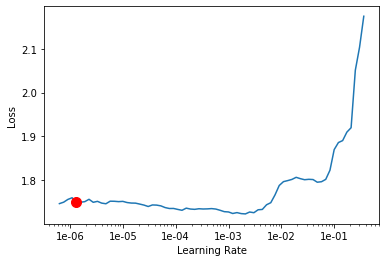

In [367]:
learn2.lr_find()
learn2.recorder.plot(suggestion=True)

In [370]:
learn2.fit_one_cycle(1, max_lr=1e-06)


epoch,train_loss,valid_loss,accuracy,time
0,1.710830,1.999727,0.130993,23:35


In [369]:

learn2.save('stage-1')

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 1.74E-02


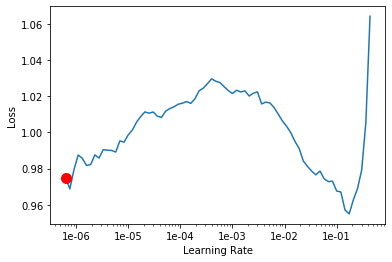

In [301]:
learn2.lr_find()
learn2.recorder.plot(suggestion=True)

In [303]:
learn2.fit_one_cycle(1, max_lr=5e-06)


epoch,train_loss,valid_loss,accuracy,time
0,0.992836,1.199239,0.614002,14:01


In [310]:
learn2.save('stage-2')

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 9.12E-07
Min loss divided by 10: 1.00E-02


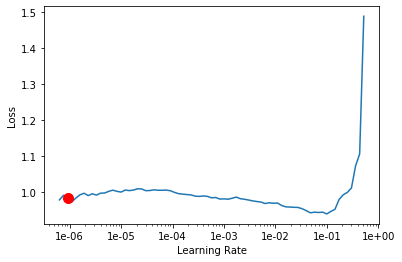

In [311]:
learn2.lr_find()
learn2.recorder.plot(suggestion=True)

In [307]:
row = analysis_df.iloc[700:1200]


In [308]:
row

,product_id_name,user_nickname,rating,skinConcerns,skinType,IncentivizedReview,hairCondition,hairColor,hairConcerns,beautyInsider,skinTone,age,eyeColor,product_category_primary,product_category_secondary
1060,c5b270c4-a41a-4248-b955-d83cd17dc3ae Solstice ...,jmmj0710,5,NaN,dry,False,NaN,brunette,NaN,NaN,light,18to24,brown,Makeup,Eye
1061,c5b270c4-a41a-4248-b955-d83cd17dc3ae Solstice ...,Mollylou99,5,NaN,combination,False,NaN,brunette,NaN,NaN,light,NaN,green,Makeup,Eye
1062,c5b270c4-a41a-4248-b955-d83cd17dc3ae Solstice ...,christianglopez,5,NaN,normal,False,NaN,brunette,NaN,NaN,medium,NaN,hazel,Makeup,Eye
1063,0092a303-e6f6-4eb1-8614-fa220a402a09 Complete ...,minagh,5,NaN,combination,NaN,NaN,NaN,NaN,yes,light,over54,NaN,Skincare,NaN
1064,c5b270c4-a41a-4248-b955-d83cd17dc3ae Solstice ...,Vicnclark,5,NaN,dry,False,NaN,brunette,NaN,NaN,light,NaN,blue,Makeup,Eye
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1798,c685150a-5760-47f3-a2f4-78dc4ab79366 Pore Corr...,steelerfan,5,NaN,normal,NaN,NaN,NaN,NaN,yes,NaN,35to44,NaN,Skincare,NaN
1799,c685150a-5760-47f3-a2f4-78dc4ab79366 Pore Corr...,ionebfairy,2,NaN,oily,False,NaN,NaN,NaN,yesvibr,NaN,18to24,NaN,Skincare,NaN
1800,c685150a-5760-47f3-a2f4-78dc4ab79366 Pore Corr...,tinkcouture,5,NaN,combination,NaN,NaN,NaN,NaN,yesvib,NaN,18to24,NaN,Skincare,NaN
1801,c685150a-5760-47f3-a2f4-78dc4ab79366 Pore Corr...,ihavenoalias,5,NaN,combination,NaN,NaN,NaN,NaN,yesvib,NaN,25to34,NaN,Skincare,NaN


In [309]:
# for r in row.iterrows():
#     prediction = learn2.predict(r)
#     rating = r['rating']
#     print(f'prediction:{prediction} actual:{rating}')
type(row)    
for index, v in row.iterrows():
    prediction = learn2.predict(v)
    print(f'actual: {v["rating"]} prediction: {prediction}')
    

actual: 5 prediction: (Category 5, tensor(4), tensor([0.0216, 0.0182, 0.0247, 0.0793, 0.8563]))
actual: 5 prediction: (Category 5, tensor(4), tensor([0.0184, 0.0244, 0.0436, 0.0986, 0.8149]))
actual: 5 prediction: (Category 5, tensor(4), tensor([0.0220, 0.0183, 0.0288, 0.0863, 0.8447]))
actual: 5 prediction: (Category 5, tensor(4), tensor([0.0679, 0.0421, 0.0562, 0.1336, 0.7001]))
actual: 5 prediction: (Category 5, tensor(4), tensor([0.0254, 0.0219, 0.0323, 0.1016, 0.8189]))
actual: 5 prediction: (Category 5, tensor(4), tensor([0.0224, 0.0187, 0.0284, 0.0889, 0.8416]))
actual: 5 prediction: (Category 5, tensor(4), tensor([0.0122, 0.0179, 0.0293, 0.0736, 0.8670]))
actual: 5 prediction: (Category 5, tensor(4), tensor([0.0177, 0.0153, 0.0244, 0.0820, 0.8606]))
actual: 5 prediction: (Category 5, tensor(4), tensor([0.0299, 0.0271, 0.0414, 0.0985, 0.8031]))
actual: 5 prediction: (Category 5, tensor(4), tensor([0.0212, 0.0181, 0.0278, 0.0807, 0.8523]))
actual: 5 prediction: (Category 5, tenso

actual: 5 prediction: (Category 5, tensor(4), tensor([0.0624, 0.0631, 0.0744, 0.1385, 0.6616]))
actual: 5 prediction: (Category 5, tensor(4), tensor([0.0594, 0.0417, 0.0600, 0.1157, 0.7231]))
actual: 5 prediction: (Category 5, tensor(4), tensor([0.0428, 0.0305, 0.0446, 0.1167, 0.7654]))
actual: 5 prediction: (Category 5, tensor(4), tensor([0.0483, 0.0527, 0.0863, 0.1484, 0.6644]))
actual: 5 prediction: (Category 5, tensor(4), tensor([0.0545, 0.0373, 0.0483, 0.1168, 0.7431]))
actual: 5 prediction: (Category 5, tensor(4), tensor([0.0876, 0.0493, 0.0587, 0.1287, 0.6757]))
actual: 5 prediction: (Category 5, tensor(4), tensor([0.0719, 0.0431, 0.0551, 0.1264, 0.7035]))
actual: 5 prediction: (Category 5, tensor(4), tensor([0.0329, 0.0325, 0.0523, 0.1379, 0.7444]))
actual: 5 prediction: (Category 5, tensor(4), tensor([0.0697, 0.0467, 0.0685, 0.1336, 0.6814]))
actual: 3 prediction: (Category 5, tensor(4), tensor([0.1002, 0.0631, 0.0749, 0.1513, 0.6105]))
actual: 5 prediction: (Category 5, tenso

actual: 5 prediction: (Category 5, tensor(4), tensor([0.0827, 0.0464, 0.0601, 0.1329, 0.6779]))
actual: 4 prediction: (Category 5, tensor(4), tensor([0.0802, 0.0651, 0.0829, 0.1483, 0.6236]))
actual: 5 prediction: (Category 5, tensor(4), tensor([0.0456, 0.0333, 0.0508, 0.1362, 0.7341]))
actual: 5 prediction: (Category 5, tensor(4), tensor([0.0952, 0.0570, 0.0707, 0.1238, 0.6533]))
actual: 3 prediction: (Category 5, tensor(4), tensor([0.0836, 0.0472, 0.0614, 0.1364, 0.6715]))
actual: 5 prediction: (Category 5, tensor(4), tensor([0.0513, 0.0380, 0.0589, 0.1262, 0.7255]))
actual: 5 prediction: (Category 5, tensor(4), tensor([0.0736, 0.0424, 0.0563, 0.1206, 0.7071]))
actual: 4 prediction: (Category 5, tensor(4), tensor([0.0817, 0.0458, 0.0591, 0.1313, 0.6821]))
actual: 4 prediction: (Category 5, tensor(4), tensor([0.0868, 0.0476, 0.0596, 0.1301, 0.6759]))
actual: 5 prediction: (Category 5, tensor(4), tensor([0.0606, 0.0439, 0.0553, 0.1285, 0.7116]))
actual: 4 prediction: (Category 5, tenso

actual: 5 prediction: (Category 5, tensor(4), tensor([0.0833, 0.0458, 0.0548, 0.1182, 0.6979]))
actual: 5 prediction: (Category 5, tensor(4), tensor([0.0545, 0.0384, 0.0531, 0.1101, 0.7438]))
actual: 1 prediction: (Category 5, tensor(4), tensor([0.1360, 0.0829, 0.0719, 0.1112, 0.5980]))
actual: 5 prediction: (Category 5, tensor(4), tensor([0.0734, 0.0418, 0.0524, 0.1171, 0.7154]))
actual: 5 prediction: (Category 5, tensor(4), tensor([0.1107, 0.0745, 0.0741, 0.1384, 0.6023]))
actual: 5 prediction: (Category 5, tensor(4), tensor([0.0531, 0.0343, 0.0502, 0.1326, 0.7297]))
actual: 1 prediction: (Category 5, tensor(4), tensor([0.1235, 0.0609, 0.0607, 0.1161, 0.6388]))
actual: 5 prediction: (Category 5, tensor(4), tensor([0.0548, 0.0361, 0.0548, 0.1133, 0.7409]))
actual: 4 prediction: (Category 5, tensor(4), tensor([0.0723, 0.0532, 0.0735, 0.1744, 0.6266]))
actual: 5 prediction: (Category 5, tensor(4), tensor([0.0777, 0.0495, 0.0661, 0.1298, 0.6769]))
actual: 5 prediction: (Category 5, tenso

actual: 5 prediction: (Category 5, tensor(4), tensor([0.0411, 0.0304, 0.0429, 0.0960, 0.7895]))
actual: 5 prediction: (Category 5, tensor(4), tensor([0.0709, 0.0448, 0.0494, 0.1116, 0.7233]))
actual: 4 prediction: (Category 5, tensor(4), tensor([0.0811, 0.0631, 0.0889, 0.2446, 0.5223]))
actual: 4 prediction: (Category 5, tensor(4), tensor([0.0545, 0.0353, 0.0438, 0.1109, 0.7555]))
actual: 5 prediction: (Category 5, tensor(4), tensor([0.0532, 0.0345, 0.0425, 0.1075, 0.7623]))
actual: 4 prediction: (Category 5, tensor(4), tensor([0.0850, 0.0790, 0.0869, 0.1666, 0.5824]))
actual: 5 prediction: (Category 5, tensor(4), tensor([0.0417, 0.0458, 0.0550, 0.0881, 0.7694]))
actual: 5 prediction: (Category 5, tensor(4), tensor([0.0484, 0.0326, 0.0431, 0.1118, 0.7641]))
actual: 5 prediction: (Category 5, tensor(4), tensor([0.0474, 0.0314, 0.0405, 0.1059, 0.7748]))
actual: 5 prediction: (Category 5, tensor(4), tensor([0.0553, 0.0360, 0.0441, 0.1094, 0.7553]))
actual: 4 prediction: (Category 5, tenso

actual: 5 prediction: (Category 5, tensor(4), tensor([0.0466, 0.0300, 0.0441, 0.1161, 0.7632]))
actual: 2 prediction: (Category 5, tensor(4), tensor([0.0623, 0.0423, 0.0579, 0.1459, 0.6916]))
actual: 5 prediction: (Category 5, tensor(4), tensor([0.0449, 0.0300, 0.0458, 0.1115, 0.7679]))
actual: 4 prediction: (Category 5, tensor(4), tensor([0.0884, 0.0637, 0.0818, 0.1725, 0.5936]))
actual: 5 prediction: (Category 5, tensor(4), tensor([0.0598, 0.0448, 0.0765, 0.1265, 0.6923]))
actual: 5 prediction: (Category 5, tensor(4), tensor([0.0396, 0.0266, 0.0413, 0.1087, 0.7839]))
actual: 5 prediction: (Category 5, tensor(4), tensor([0.0527, 0.0422, 0.0476, 0.1075, 0.7500]))
actual: 5 prediction: (Category 5, tensor(4), tensor([0.0395, 0.0327, 0.0445, 0.1141, 0.7692]))
actual: 5 prediction: (Category 5, tensor(4), tensor([0.0425, 0.0335, 0.0495, 0.1154, 0.7591]))
actual: 5 prediction: (Category 5, tensor(4), tensor([0.0586, 0.0357, 0.0495, 0.1211, 0.7351]))
actual: 5 prediction: (Category 5, tenso

In [191]:
analysis_df.columns

Index(['product_id_name', 'user_nickname', 'rating', 'StaffContext',
       'VerifiedPurchaser', 'skinConcerns', 'skinType', 'IncentivizedReview',
       'hairCondition', 'hairColor', 'hairConcerns', 'beautyInsider',
       'skinTone', 'age', 'eyeColor', 'product_category_primary',
       'product_category_secondary'],
      dtype='object')

In [218]:
analysis_df['product_category_primary'].value_counts()

Skincare           50990
Makeup             45355
Hair               19668
Fragrance          17979
Bath & Body         3686
Men                 1949
Mini Size           1393
Tools & Brushes      743
Gifts                 15
Name: product_category_primary, dtype: int64

In [219]:
analysis_df['product_category_primary'].value_counts().sum()

141778

In [217]:
86589/141849

0.6104308102277775

In [196]:
analysis_df.shape

(141849, 17)

In [197]:
(2877 + 1548)/141849

0.031195144132140515

### Use the dataframe with users only having more than 3 reviews

In [465]:
analysis_df2 = relevant_df[['product_id', 
    'product', 
    'brand', 
    'user_nickname', 
    'rating',    
    'StaffContext', 
    'VerifiedPurchaser', 
    'skinConcerns', 
    'skinType',
    'IncentivizedReview',
    'hairCondition',
    'hairColor',
    'beautyInsider',    
    'skinTone',
    'hairConcerns',                                     
    'age',
    'eyeColor',
    'product_category_primary',
    'product_category_secondary'
   ]]
analysis_df2.head()
analysis_df2['product_id_name'] = df['product_id'] + " " + df['product'].astype(str) + " " + df['brand'].astype(str)
analysis_df2.head()

/home/sidravic/Dropbox/code/workspace/rails_apps/idylmynds/data_preprocessing/venv/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,product_id,product,brand,user_nickname,rating,StaffContext,VerifiedPurchaser,skinConcerns,skinType,IncentivizedReview,hairCondition,hairColor,beautyInsider,skinTone,hairConcerns,age,eyeColor,product_category_primary,product_category_secondary,product_id_name
7,1a21cbc0-44c8-4581-bc3f-0f8b32292864,Glycolic Facial Cleanser,Anthony,beautyman,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,25to34,NaN,Men,NaN,1a21cbc0-44c8-4581-bc3f-0f8b32292864 Glycolic ...
15,9d4a9592-30e8-43f7-82f1-aee20f70941e,Pre-Shave Oil - Lavender,The Art of Shaving,elizbeth1972,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,25to34,NaN,Men,Shaving,9d4a9592-30e8-43f7-82f1-aee20f70941e Pre-Shave...
24,c13f89a2-1b65-4455-97bf-7d1fa09c1bfe,Facial Scrub,Anthony,AngyInToronto,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Men,Skincare,c13f89a2-1b65-4455-97bf-7d1fa09c1bfe Facial Sc...
32,94d1384c-1b58-402f-96a8-30d82fb1a106,Pre-Shave Oil - Unscented,The Art of Shaving,carolineg,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,25to34,NaN,Men,Shaving,94d1384c-1b58-402f-96a8-30d82fb1a106 Pre-Shave...
49,86a29c30-337f-466c-a2f1-1ed87b945659,Rosa Nobile,Acqua Di Parma,littleivy,5,False,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fragrance,Women,86a29c30-337f-466c-a2f1-1ed87b945659 Rosa Nobi...


In [471]:
dep_var2 = 'rating'
cat_names2 = ['product_id_name',     
    'user_nickname',       
    'StaffContext', 
    'VerifiedPurchaser', 
    'skinConcerns', 
    'skinType',
    'IncentivizedReview',
    'hairCondition',
    'hairColor',
    'hairConcerns',         
    'beautyInsider',
    'skinTone',
    'eyeColor',
    'age',          
    'product_category_primary',
    'product_category_secondary']
cont_names2 = []
procs2 = [FillMissing, Categorify, Normalize]




In [472]:
analysis_df2.shape
13181 * 20/100

2636.2

In [473]:
test2 = TabularList.from_df(analysis_df2.iloc[500:900].copy(), 
                           path=path, 
                           cat_names=cat_names2, 
                           cont_names=cont_names2)

data2 = (TabularList.from_df(analysis_df, cat_names=cat_names2, procs=procs2)
                   .split_by_idx(list(range(2000, 4500)))
                   .label_from_df(cols=dep_var2)
                   .add_test(test2)
                   .databunch(bs=64))



data2.show_batch(rows=50)

product_id_name,user_nickname,StaffContext,VerifiedPurchaser,skinConcerns,skinType,IncentivizedReview,hairCondition,hairColor,hairConcerns,beautyInsider,skinTone,eyeColor,age,product_category_primary,product_category_secondary,target
16420ae8-1af3-4016-9689-21e6a411a1a6 Monochromatic Matte + Shimmer Bronzer Duo COVER FX,jlaurs,False,#na#,#na#,combination,False,#na#,blonde,#na#,#na#,fair,green,#na#,Makeup,#na#,5
1d4437bd-e416-4192-9c66-3d5201733d07 Expensive Amla Oil Hi-Shine Topcoat IGK,sm288,#na#,#na#,#na#,dry,#na#,chemicallyTreated,brunette,Damage,#na#,fair,brown,#na#,Hair,Hair Styling & Treatments,5
46a1a18e-e838-4079-af1b-38f1dd536d6c Angel Mugler,sanfranchic,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,yes,#na#,#na#,25to34,Fragrance,Women,5
82c526b4-96d3-4d87-9452-15f521e45f1c Pro Light St. Tropez Tanning Essentials,kamid,False,#na#,#na#,#na#,False,#na#,#na#,#na#,yes,#na#,#na#,45to54,Skincare,High Tech Tools,5
a305788d-8564-4514-9209-ddb55807288f Drink Up&#x2122; Intensive Overnight Hydrating Mask with Avocado &amp; Swiss Glacier Water Origins,danakinana,False,#na#,#na#,#na#,False,#na#,#na#,#na#,#na#,#na#,#na#,#na#,Skincare,Masks,5
baf42141-7919-4032-9243-166f394693d1 GrandeLIPS Hydrating Lip Plumper Gloss Grande Cosmetics,Camarogirl2012,False,#na#,#na#,#na#,False,#na#,#na#,#na#,yesvibr,light,green,45to54,Makeup,Lip,2
13625653-497b-4682-8415-5c1ef20c6cbf Tarteist&#x2122; Double Take Eyeliner tarte,englishrose1986,#na#,#na#,#na#,dry,#na#,#na#,brunette,#na#,#na#,tan,brown,#na#,Makeup,Eye,5
a7c28e28-eea6-462e-adee-2f1ccaa708e1 BlitzTrance&#x2122; Lipstick PAT McGRATH LABS,Wolfgirl22,#na#,#na#,#na#,combination,#na#,#na#,brunette,#na#,#na#,porcelain,hazel,#na#,Makeup,Lip,4
ac98ebf8-6cb4-4ead-939b-826b8241312e Virgin Marula Antioxidant Face Oil Drunk Elephant,Queenesty,False,#na#,#na#,#na#,False,#na#,#na#,#na#,#na#,#na#,#na#,#na#,Skincare,Moisturizers,5
0b2611fa-9588-46f7-92fe-5b1f586e21e3 Farewell Frizz&#x2122; Smoothing Shampoo Briogeo,Aileenee,False,#na#,#na#,#na#,False,#na#,#na#,#na#,#na#,#na#,#na#,#na#,Hair,Shampoo & Conditioner,2


In [477]:
learner = tabular_learner(data2, layers=[200,100], metrics=accuracy)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 5.75E-02
Min loss divided by 10: 1.74E-02


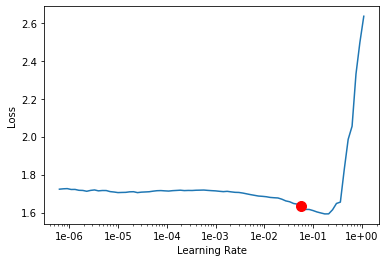

In [478]:
learner.lr_find()
learner.recorder.plot(suggestion=True)

In [479]:
learner.fit_one_cycle(1, max_lr=3e-01)


epoch,train_loss,valid_loss,accuracy,time
0,1.124305,1.223603,0.628400,25:17


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.09E-05
Min loss divided by 10: 6.31E-08


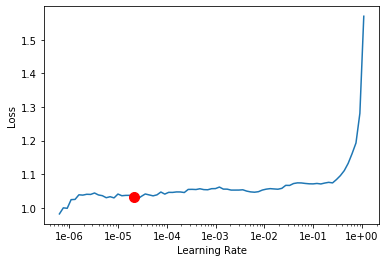

In [480]:
learner.lr_find()
learner.recorder.plot(suggestion=True)

In [ ]:
learner.fit_one_cycle(1, max_lr=5e-04)

epoch,train_loss,valid_loss,accuracy,time
